# Mohammed Al Mujadib


# Project : Wrangle and Analyze Data


## Table of Contents:
- [Gathering](#Gathering)
- [Assessing](#Assessing)
- [Cleaning](#Gathering)
- [Analysis](#Analysis)

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

<a id='Gathering'></a>
## 1-Gathering:

**Read twitter archive File:**

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced-2.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Fetch and read TSV file:**

In [3]:
req = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
import os
with open ('image-predictions-3.tsv', 'wb') as file:
    file.write(req.content)

In [5]:
df_image_predictions = pd.read_csv('image_predictions-3.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Twitter API & JSON:**

In [6]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'



# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Fail
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809:

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

**Store data in Dataframes:**

In [7]:
df_list = []
with open('tweet-json.txt', 'r', encoding='utf8') as api:
    for line in api:
        tweet_line = json.loads(line)
        df_list.append({'Tweet_id': tweet_line['id'],
                        'Likes': tweet_line['favorite_count'],
                        'RT': tweet_line['retweet_count']})
df_API = pd.DataFrame(df_list)
df_API.head(2)

,Tweet_id,Likes,RT
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514


<a id='Assessing'></a>
## 2-Assessing:

**Visual assessment:**

In [8]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
df_API

,Tweet_id,Likes,RT
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


**Programmatic Assessment:**

In [11]:
df_twitter.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
df_twitter.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
715,783839966405230592,NaN,NaN,2016-10-06 01:23:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. His owner put a donut pillow ar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783839966...,13,10,Riley,None,None,None,None
566,802247111496568832,NaN,NaN,2016-11-25 20:26:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None
2114,670433248821026816,NaN,NaN,2015-11-28 02:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sam. He's trying to escape the inordin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670433248...,10,10,Sam,None,None,None,None
1606,685667379192414208,NaN,NaN,2016-01-09 03:40:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marty. He has no idea what happened he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685667379...,9,10,Marty,None,None,pupper,None
1305,707387676719185920,NaN,NaN,2016-03-09 02:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clarkus. He's a Skinny Eastern Worcesters...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707387676...,10,10,Clarkus,None,None,None,None
706,785533386513321988,NaN,NaN,2016-10-10 17:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dallas. Her tongue is ridiculous. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785533386...,11,10,Dallas,None,None,None,None
1671,682393905736888321,NaN,NaN,2015-12-31 02:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,None,None,None,None
904,758355060040593408,NaN,NaN,2016-07-27 17:35:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Corey. He's a Portobello Corgicool. Tr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758355060...,11,10,Corey,None,None,None,None
1757,678764513869611008,NaN,NaN,2015-12-21 02:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wilson. He got caught humping the futon. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678764513...,10,10,Wilson,None,None,None,None
1530,690021994562220032,NaN,NaN,2016-01-21 04:03:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Geoff (pronounced ""Kyle""). He acc...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690021994...,10,10,Geoff,None,None,None,None


In [15]:
df_twitter.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Marlee       1
his          1
Coopson      1
Teddy        1
Bayley       1
Name: name, Length: 957, dtype: int64

In [16]:
df_twitter.query("name == 'a'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [17]:
df_twitter.query("name == 'Cooper'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
124,868639477480148993,NaN,NaN,2017-05-28 01:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Cooper. His expres...,8.685523e+17,4.196984e+09,2017-05-27 19:39:34 +0000,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
483,814986499976527872,NaN,NaN,2016-12-31 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814986499...,11,10,Cooper,None,None,pupper,None
532,808001312164028416,NaN,NaN,2016-12-11 17:31:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He likes to stick his tongue o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,None,None,None,None
607,798209839306514432,NaN,NaN,2016-11-14 17:03:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. His bow tie was too heavy for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798209839...,13,10,Cooper,None,None,None,None
910,757611664640446465,NaN,NaN,2016-07-25 16:21:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He tries to come across as fei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757611664...,12,10,Cooper,None,None,None,None
961,751132876104687617,NaN,NaN,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,None,None,None,puppo
1291,708119489313951744,NaN,NaN,2016-03-11 02:36:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He basks in the glory of rebel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708119489...,9,10,Cooper,None,None,None,None
1333,705442520700944385,NaN,NaN,2016-03-03 17:19:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He only wakes up to switch gea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705442520...,12,10,Cooper,None,None,None,None
1395,699801817392291840,NaN,NaN,2016-02-17 03:45:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He began to tear up when his b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699801817...,11,10,Cooper,None,None,pupper,None


In [18]:
df_twitter.query("name == 'this'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [19]:
df_twitter.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [20]:
df_twitter.round(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


**number of missing values in expanded_urls column:** 

In [21]:
sum(df_twitter.expanded_urls.isnull())

59

In [22]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1343,759047813560868866,https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg,1,Labrador_retriever,0.778546,True,bathing_cap,0.154254,False,golden_retriever,0.024972,True
1230,745712589599014916,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False
791,690690673629138944,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1,bath_towel,0.194532,False,radiator,0.127776,False,Maltese_dog,0.089625,True
1828,835574547218894849,https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg,1,Staffordshire_bullterrier,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True
462,674805413498527744,https://pbs.twimg.com/ext_tw_video_thumb/67480...,1,English_springer,0.594467,True,cocker_spaniel,0.389994,True,Welsh_springer_spaniel,0.007096,True
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
388,673355879178194945,https://pbs.twimg.com/media/CVg9mTYWIAAu7J6.jpg,1,Rottweiler,0.529248,True,miniature_pinscher,0.168296,True,Appenzeller,0.100452,True
987,707741517457260545,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,1,whippet,0.738371,True,Italian_greyhound,0.191789,True,American_Staffordshire_terrier,0.020126,True
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True


In [24]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_image_predictions.round(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.4651,True,collie,0.1567,True,Shetland_sheepdog,0.0614,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.5068,True,miniature_pinscher,0.0742,True,Rhodesian_ridgeback,0.0720,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.5965,True,malinois,0.1386,True,bloodhound,0.1162,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.4081,True,redbone,0.3607,True,miniature_pinscher,0.2228,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.5603,True,Rottweiler,0.2437,True,Doberman,0.1546,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.5557,True,English_springer,0.2258,True,German_short-haired_pointer,0.1752,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.1703,False,Labrador_retriever,0.1681,True,spatula,0.0408,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.7160,True,malamute,0.0783,True,kelpie,0.0314,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.3236,True,Pekinese,0.0906,True,papillon,0.0690,True


In [27]:
df_image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg    2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg    2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg    2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg    2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg    2
                                                  ..
https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg    1
https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg    1
https://pbs.twimg.com/media/CVRVvRMWEAIBKOP.jpg    1
https://pbs.twimg.com/media/CUYrBNQUkAA-zx4.jpg    1
https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [28]:
df_image_predictions.query('jpg_url == "https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
1712,818588835076603904,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True


In [29]:
df_image_predictions.query('jpg_url == "https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False


In [30]:
df_API.head(10)

,Tweet_id,Likes,RT
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [31]:
df_API.sample(10)

,Tweet_id,Likes,RT
2317,666447344410484738,107,23
1303,707387676719185920,3835,1490
1095,736225175608430592,8901,3115
2195,668826086256599040,467,150
1681,681694085539872773,14010,4581
1003,747651430853525504,1520,179
31,886054160059072513,0,108
4,891327558926688256,41048,9774
2256,667724302356258817,517,341
2203,668633411083464705,3024,1788


In [32]:
df_API.describe()

,Tweet_id,Likes,RT
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [33]:
df_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Tweet_id  2354 non-null   int64
 1   Likes     2354 non-null   int64
 2   RT        2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality Issues:

**1-There is (59) row that does not have expanded_url, and they are not useful so.**

**2-img_num column should be converted to category date type in Image Prediction Dataset.**

**3-There are too many duplicate tweet (818588835076603904) & (773547596996571136), (739544079319588864) & (759566828574212096)in Image Prediction Dataset.**

**4-In twitter archive dataset we should remove the (a) tag and make the column contain the (URL) for the source of tweet only.**

**5-There are (55) dog who have no name and their name recorded as letter (a) in twitter archive dataset.
6-Timestamp should be converted to datetime.**

**7-The names and type that is unavailable should be (null).**

**8-There are an issue in tweet ID (731156023742988288) because in the dataset their name is recorded as (this) but the actual tweet did not mention any name of the dogs, and in the tweet ID (748575535303884801) the dog has no name in the tweet and it recorded as (one).**

## Tidiness Issues:

**1-In twitter archive dataset we should have one column instead of having four columns for each type and we should call that column is (type).**

**2-Create master dataframe that merge all the dataframes togther.**

**3-In twitter archive dataset we should create new column called (Rating) instead of two column, and that column will be created based on the (rating_numerator) column & (rating_denominator) column**

<a id='Cleaning'></a>
## 3- Cleaning:

**Copies of the original files to clean:**

In [34]:
df_archives = df_twitter.copy()
df_img = df_image_predictions.copy()
df_api = df_API.copy()

**Define:**

**droping the missing value of expanded_urls column:**

**code:**

In [35]:
df_archives.dropna(subset = ['expanded_urls'] , inplace = True)

**Test:**

In [36]:
sum(df_archives.expanded_urls.isnull())

0

**Define:**

**Convert timestamp data type from string to datetime:**

**Code:**

In [37]:
df_archives.timestamp =  pd.to_datetime(df_archives['timestamp'])

**Test:**

In [38]:
df_archives.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

**Define:**

**Remove the Anchor tag from the source column:**

**Code:**

In [39]:
import re
df_archives.source = df_archives.source.apply(lambda x: re.sub('<[^<]+?>', '', x))

**Test:**

In [40]:
df_archives.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
503,813066809284972545,NaN,NaN,2016-12-25 17:00:08+00:00,Twitter for iPhone,This is Tyr. He is disgusted by holiday traffi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813066809...,12,10,Tyr,None,None,None,None
1146,727155742655025152,NaN,NaN,2016-05-02 15:20:13+00:00,Vine - Make a Scene,When you're trying to enjoy yourself but end u...,NaN,NaN,NaN,https://vine.co/v/ixa1ejbXiM7,11,10,None,None,None,None,None
390,826240494070030336,NaN,NaN,2017-01-31 01:27:39+00:00,Twitter for iPhone,We only rate dogs. Please don't send in any mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826240494...,11,10,None,None,None,None,None
246,845677943972139009,NaN,NaN,2017-03-25 16:45:08+00:00,Twitter for iPhone,C'mon guys. Please only send in dogs. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845677943...,12,10,None,None,None,None,None
618,796177847564038144,NaN,NaN,2016-11-09 02:29:25+00:00,Twitter for iPhone,RT @dog_rates: This is Ruby. She just turned o...,7.961497e+17,4.196984e+09,2016-11-09 00:37:46 +0000,https://twitter.com/dog_rates/status/796149749...,11,10,Ruby,None,None,None,None
549,805207613751304193,NaN,NaN,2016-12-04 00:30:29+00:00,Twitter for iPhone,This is Shooter. He's doing quite the snowy zo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805207613...,12,10,Shooter,None,None,None,None
1500,692158366030913536,NaN,NaN,2016-01-27 01:33:08+00:00,Twitter for iPhone,This is Edgar. He's a Sassafras Puggleflash. N...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692158366...,10,10,Edgar,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
1824,676496375194980353,NaN,NaN,2015-12-14 20:17:59+00:00,Twitter for iPhone,Say hello to Griffin. He's upset because his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676496375...,9,10,Griffin,None,None,None,None
69,879050749262655488,NaN,NaN,2017-06-25 18:56:45+00:00,Twitter for iPhone,This is Steven. He has trouble relating to oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,None,None,None


**Define:**

**Reaplace dog name "a" to "None":**

**Code:**

In [41]:
df_archives.name = df_archives.name.str.replace('a', 'None')

**Test:**

In [42]:
df_archives.query("name == 'a'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Define:**

**There are duplicate tweet with tweet ID (868552278524837888) & (868639477480148993) and we will drop one of them:**

**Code:**

In [43]:
df_archives.query('tweet_id == 868552278524837888 or tweet_id == 868639477480148993')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
124,868639477480148993,NaN,NaN,2017-05-28 01:26:04+00:00,Twitter for iPhone,RT @dog_rates: Say hello to Cooper. His expres...,8.685523e+17,4.196984e+09,2017-05-27 19:39:34 +0000,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34+00:00,Twitter for iPhone,Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None


In [44]:
df_archives = df_archives[df_archives['tweet_id'] != 868639477480148993]

**Test:**

In [45]:
df_archives.query('tweet_id == 868639477480148993')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Define:**

**Replace the rating_numerator from (9) to (14) & rating_denominator from (11) to (10) with the tweet ID (740373189193256964), we could use loc function:**

**Code:**

In [46]:
df_archives.query('tweet_id == 740373189193256964')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [47]:
df_archives.loc[df_archives['tweet_id'] == 740373189193256964, 'rating_numerator'] = 14
df_archives.loc[df_archives['tweet_id'] == 740373189193256964, 'rating_denominator'] = 10

**Test:**

In [48]:
df_archives.query('tweet_id == 740373189193256964')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None


**Define:**

**Replace the rating_numerator from (4) to (13) & rating_denominator from (20) to (10) with the tweet ID (722974582966214656), we could use loc function:**

**Code:**

In [49]:
df_archives.query('tweet_id == 722974582966214656')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None


In [50]:
df_archives.loc[df_archives['tweet_id'] == 722974582966214656, 'rating_numerator'] = 13
df_archives.loc[df_archives['tweet_id'] == 722974582966214656, 'rating_denominator'] = 10

**Test:**

In [51]:
df_archives.query('tweet_id == 722974582966214656')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None


In [52]:
df_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,PhineNones,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,DNonerlNone,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,FrNonenklin,None,None,None,None


**Define:**


**Name issue in Tweet ID (731156023742988288) & Tweet ID (748575535303884801)**


**Code:**

In [53]:
df_archives.query('tweet_id == 731156023742988288')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [54]:
df_archives.query('tweet_id == 748575535303884801')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50+00:00,Twitter for iPhone,This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,one,None,None,None,None


In [55]:
df_archives.name = df_archives.name.replace('this' , 'None')
df_archives.name = df_archives.name.replace('one' , 'None')

**Test:**

In [56]:
df_archives.query('tweet_id == 731156023742988288')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,None,None,None,None,None


In [57]:
df_archives.query('tweet_id == 748575535303884801')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50+00:00,Twitter for iPhone,This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,None,None,None,None,None


**Define:**

**Replace names and type that is unavailable to (null):**

**Code:**

In [58]:
df_archives = df_archives.replace('None',np.NaN)

**Test:**

In [59]:
df_archives.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
511,811985624773361665,NaN,NaN,2016-12-22 17:23:53+00:00,Twitter for iPhone,Say hello to Ted. He accidentally opened the f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811985624...,11,10,Ted,NaN,NaN,NaN,NaN
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08+00:00,Twitter for iPhone,Meet Ralf. He's a miniature Buick DiCaprio. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669324657...,11,10,RNonelf,NaN,NaN,NaN,NaN
937,753298634498793472,NaN,NaN,2016-07-13 18:42:44+00:00,Twitter for iPhone,RT @dog_rates: This is Carly. She's actually 2...,6.815232e+17,4.196984e+09,2015-12-28 17:12:42 +0000,https://twitter.com/dog_rates/status/681523177...,12,10,CNonerly,NaN,NaN,NaN,NaN
651,792773781206999040,NaN,NaN,2016-10-30 17:02:53+00:00,Twitter for iPhone,This is Monster. Not an actual monster tho. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792773781...,12,10,Monster,NaN,NaN,NaN,NaN
1904,674632714662858753,NaN,NaN,2015-12-09 16:52:27+00:00,Twitter for iPhone,Rare submerged pup here. Holds breath for a lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674632714...,5,10,NaN,NaN,NaN,NaN,NaN
2118,670420569653809152,NaN,NaN,2015-11-28 01:54:54+00:00,Twitter for iPhone,This is Damon. The newest presidential candida...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670420569...,10,10,DNonemon,NaN,NaN,NaN,NaN
2194,668892474547511297,NaN,NaN,2015-11-23 20:42:48+00:00,Twitter for iPhone,This is Ruffles. He is an Albanian Shoop Da Wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668892474...,11,10,Ruffles,NaN,NaN,NaN,NaN
2320,666437273139982337,NaN,NaN,2015-11-17 02:06:42+00:00,Twitter for iPhone,Here we see a lone northeastern Cumberbatch. H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666437273...,7,10,NaN,NaN,NaN,NaN,NaN
639,793256262322548741,NaN,NaN,2016-11-01 01:00:05+00:00,Twitter for iPhone,Oh h*ck look at this spookling right here. Fri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793256262...,12,10,NaN,NaN,NaN,NaN,NaN
2217,668528771708952576,NaN,NaN,2015-11-22 20:37:34+00:00,Twitter for iPhone,This is Gòrdón. He enjoys his razberrita by po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668528771...,12,10,Gòrdón,NaN,NaN,NaN,NaN


**Define:**

**Change Source Column to category data type:**

**Code:**

In [60]:
df_archives.source = df_archives.source.astype('category')

**Test:**

In [61]:
df_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2296 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2296 non-null   datetime64[ns, UTC]
 4   source                      2296 non-null   category           
 5   text                        2296 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2296 non-null   object             
 10  rating_numerator            2296 non-null   int64           

In [62]:
df_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2296 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2296 non-null   datetime64[ns, UTC]
 4   source                      2296 non-null   category           
 5   text                        2296 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2296 non-null   object             
 10  rating_numerator            2296 non-null   int64           

**Define:**

**Duplicate tweets with tweet ID (818588835076603904) & (773547596996571136), (739544079319588864) & (759566828574212096)**

**Code:**

In [63]:
df_img.query("tweet_id == 818588835076603904 or tweet_id == 773547596996571136 or tweet_id == 739544079319588864 or tweet_id == 759566828574212096")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
1712,818588835076603904,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True


In [64]:
df_img = df_img[df_img['tweet_id'] != 818588835076603904]
df_img = df_img[df_img['tweet_id'] != 739544079319588864]

**Test:**

In [65]:
df_img.query("tweet_id == 818588835076603904 or tweet_id == 773547596996571136 or tweet_id == 739544079319588864 or tweet_id == 759566828574212096")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True


**Define:**

**Change img_num column to category data type**

**Code:**

In [66]:
df_img.img_num = df_img.img_num.astype('category')

**Test:**

In [67]:
df_img.dtypes

tweet_id       int64
jpg_url       object
img_num     category
p1            object
p1_conf      float64
p1_dog          bool
p2            object
p2_conf      float64
p2_dog          bool
p3            object
p3_conf      float64
p3_dog          bool
dtype: object

**Define:**


**Subtract rating_numerator from rating_denominator and create new column called rating instead of two columns.**


**Code**

In [68]:
df_archives['Rating'] = df_archives.rating_numerator - df_archives.rating_denominator   

**Test:**

In [69]:
df_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,PhineNones,NaN,NaN,NaN,NaN,3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,DNonerlNone,NaN,NaN,NaN,NaN,3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,FrNonenklin,NaN,NaN,NaN,NaN,2


**Drop rating_numerator & rating_denominator:**

In [72]:
df_archives.drop('rating_numerator', axis = 1, inplace = True)
df_archives.drop('rating_denominator', axis = 1, inplace = True)

In [73]:
df_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2296 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2296 non-null   datetime64[ns, UTC]
 4   source                      2296 non-null   category           
 5   text                        2296 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2296 non-null   object             
 10  name                        1550 non-null   object          

In [74]:
df_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,Rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,PhineNones,NaN,NaN,NaN,NaN,3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,NaN,NaN,NaN,3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,NaN,NaN,NaN,2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,DNonerlNone,NaN,NaN,NaN,NaN,3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,FrNonenklin,NaN,NaN,NaN,NaN,2


**Define:**

**Create one column for the type of the dogs and call it (type) instead of four columns:**

**Code:**

In [75]:
df_archives['type'] = df_archives.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
df_archives.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

**Test:**

In [76]:
df_archives.type.value_counts()

pupper     263
doggo       90
puppo       34
floofer      4
Name: type, dtype: int64

**Define:**

**Create master Dataframe that contains all the dataframes togther:**

**Code:**

In [77]:
df_temp = pd.merge(df_archives, df_api, left_on = 'tweet_id', right_on = 'Tweet_id', how = 'inner')
df_master = pd.merge(df_temp, df_img, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

**Test:**

In [78]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2071 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2071 non-null   datetime64[ns, UTC]
 4   source                      2071 non-null   category           
 5   text                        2071 non-null   object             
 6   retweeted_status_id         78 non-null     float64            
 7   retweeted_status_user_id    78 non-null     float64            
 8   retweeted_status_timestamp  78 non-null     object             
 9   expanded_urls               2071 non-null   object             
 10  name                        1435 non-null   object          

**Store the master dataframe into CSV file:**

In [79]:
df_master.to_csv('twitter_archive_master.csv', index=False)

<a id='Analysis'></a>
## 4-Analysis:

**Q1:What is the most popular type of dog in our dataset?**

In [80]:
most_popular = df_master.type.value_counts()
print(most_popular)

pupper     229
doggo       75
puppo       29
floofer      3
Name: type, dtype: int64


**Q2:What are the most image number in each tweet?**

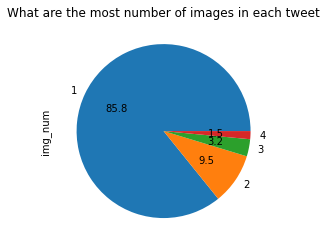

In [81]:
most_source = df_master.img_num.value_counts()
most_source.plot(kind = 'pie', autopct='%.1f');
plt.title('What are the most number of images in each tweet');

**Q3:What are the most source of the tweets?**

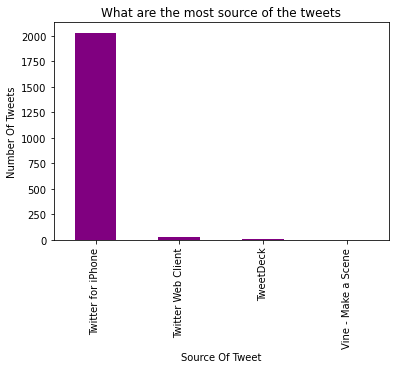

In [82]:
most_source = df_master.source.value_counts()
most_source.plot(kind = 'bar', color='purple');
plt.xlabel('Source Of Tweet');
plt.ylabel('Number Of Tweets');
plt.title('What are the most source of the tweets');